# Laboratorio Modulo C - scikit learn - Random forest

Proviamo ad applicare le random forest per fare classificazione con il dataset digits. L'obiettivo è quello di classificare automaticamente le cifre da 0 a 9.

In [1]:
# importo le varie librerie
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

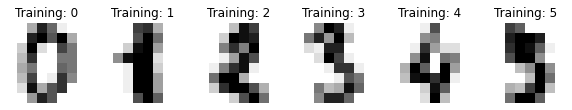

In [2]:
# carico il dataset digits
digits = datasets.load_digits()

# mostro le prime 6 immagini
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

In [3]:
# prima operazione: trasformo le immagini rappresentate come una matrice 8x8
# in un array di 64 elementi
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# creo un random forest classifier con 10 alberi
n_trees = 10

forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)

# divido training e test in 75% - 25%
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, random_state=42)

# creo il classificatore partendo dal training set
forest.fit(X_train, y_train)

# predizione sul test set
predicted = forest.predict(X_test)

Classification report for classifier RandomForestClassifier(n_estimators=10, random_state=42):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.90      1.00      0.95        37
           2       1.00      1.00      1.00        38
           3       0.96      0.93      0.95        46
           4       0.95      0.98      0.96        55
           5       1.00      0.95      0.97        59
           6       0.98      0.98      0.98        45
           7       0.95      0.98      0.96        41
           8       0.92      0.95      0.94        38
           9       1.00      0.90      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.97      0.96       450
weighted avg       0.97      0.96      0.96       450




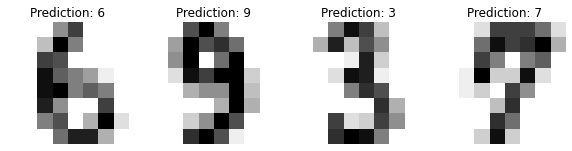

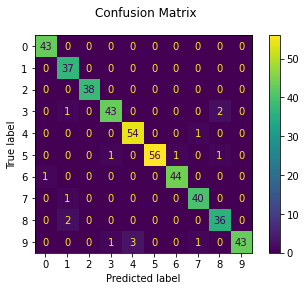

In [4]:
# mostro alcune metriche
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

print(
    f"Classification report for classifier {forest}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# per multiclass
# Precision_i = M_{ii} / \sum_j M_{ji}
# Recall_i = M_{ii} / \sum_j M_{ij}
# Controllare che i valori siano uguali a quelli
# della matrice di confusione
# from sklearn.metrics import confusion_matrix
# import numpy as np

# cm = confusion_matrix(y_test, predicted)
# recall = np.diag(cm) / np.sum(cm, axis = 1)
# precision = np.diag(cm) / np.sum(cm, axis = 0)

# print(recall)
# print(precision)


**Domanda**: quali parametri possiamo cambiare per modificare l'andamento dell'algoritmo?

Classificati non correttamente: 16
Classificata come 3, valore reale 9


<Figure size 432x288 with 0 Axes>

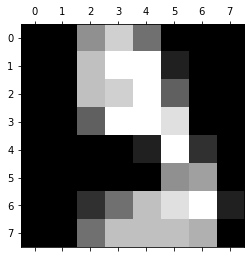

Classificata come 3, valore reale 5


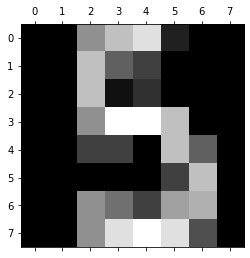

Classificata come 7, valore reale 4


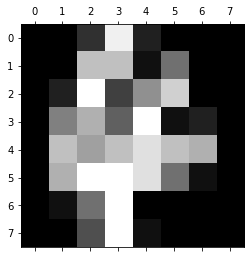

Classificata come 1, valore reale 7


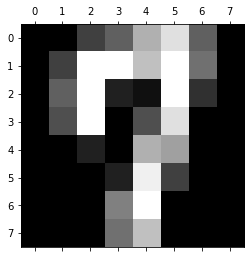

Classificata come 1, valore reale 3


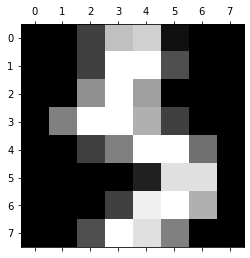

Classificata come 7, valore reale 9


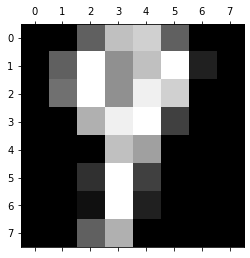

Classificata come 8, valore reale 3


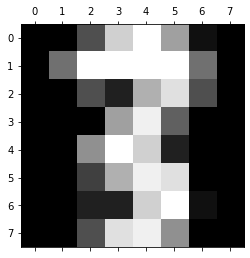

Classificata come 4, valore reale 9


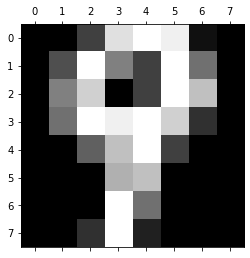

Classificata come 1, valore reale 8


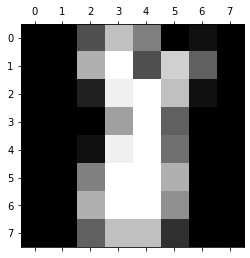

Classificata come 1, valore reale 8


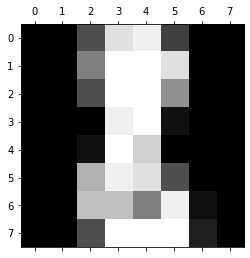

Classificata come 0, valore reale 6


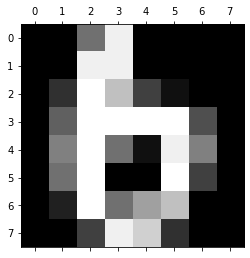

Classificata come 4, valore reale 9


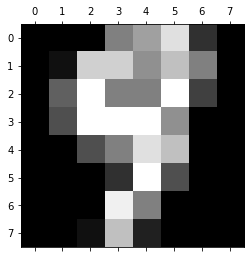

Classificata come 4, valore reale 9


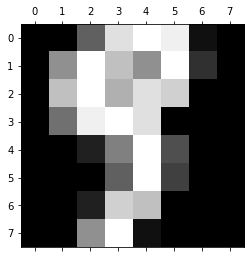

Classificata come 6, valore reale 5


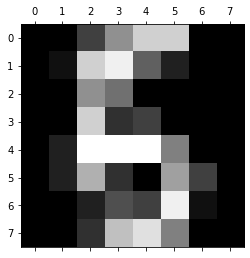

Classificata come 8, valore reale 5


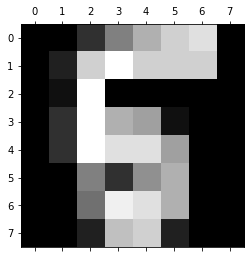

Classificata come 8, valore reale 3


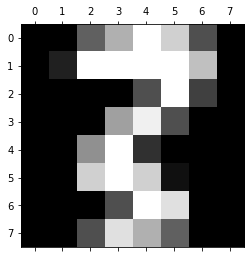

In [8]:
import matplotlib.pyplot as plt

wrong = []
for i in range(0,len(X_test)):
    prediction = predicted[i]
    label = y_test[i]
    if prediction != label:
        wrong.append(i)

print(f"Classificati non correttamente: {len(wrong)}")

plt.gray()

for i in wrong:
    print(f"Classificata come {predicted[i]}, valore reale {y_test[i]}")
    plt.matshow(X_test[i].reshape(8, 8))
    plt.show()


**Domanda**: mostrare un grafico dove, al variare del numero di alberi, vengono mostrati il numero di elementi classificati in maniera non corretta.